# Effect of different activation functions on model's performance:


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255

In [3]:
# convert labels to one hot encoded
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [27]:
# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Print the dimensions of the data
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:' , x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (36125, 32, 32, 3)
y_train shape: (36125, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
x_val shape: (6375, 32, 32, 3)
y_val shape: (6375, 10)


In [5]:
# Model with "relu" activation function.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
from keras.optimizers import SGD

model.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [7]:
history_relu = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1329/1329 [==============================] - 7s 4ms/step - loss: 2.2860 - accuracy: 0.1400 - val_loss: 2.2591 - val_accuracy: 0.2031
Epoch 2/50
1329/1329 [==============================] - 7s 6ms/step - loss: 2.1976 - accuracy: 0.2294 - val_loss: 2.1271 - val_accuracy: 0.2439
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0599 - accuracy: 0.2597 - val_loss: 2.0134 - val_accuracy: 0.2723
Epoch 4/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9717 - accuracy: 0.2916 - val_loss: 1.9514 - val_accuracy: 0.2972
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9191 - accuracy: 0.3092 - val_loss: 1.9061 - val_accuracy: 0.3123
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8863 - accuracy: 0.3228 - val_loss: 1.8734 - val_accuracy: 0.3213
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.8575 - accuracy: 0.3332 - val_loss: 1.8545 - val_accuracy:

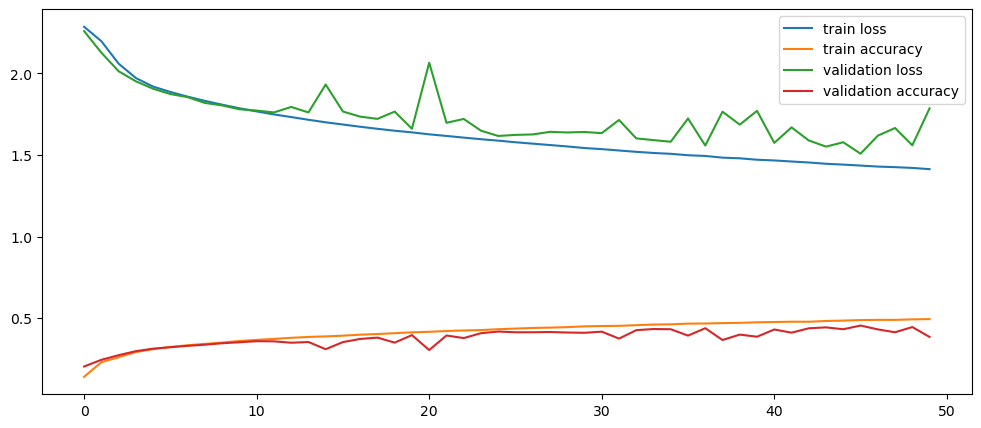

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_relu.history["loss"], label="train loss")
ax.plot(history_relu.history["accuracy"], label="train accuracy")
ax.plot(history_relu.history["val_loss"], label="validation loss")
ax.plot(history_relu.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Now we change the activation function to "SELU":
- When we use 'SELU' activation function we should notice that "LeCun kernel initializing" method is the best choice to initialize the weights.
- SELU (Scaled Exponential Linear Unit) is an activation function that introduces self-normalization, which means that the activations and gradients of the network tend to stay within a desirable range as the information flows through the layers. This property helps in addressing the vanishing/exploding gradient problem and allows deep neural networks to be trained more effectively.
- By using the SELU activation function and initializing the weights appropriately (such as with the LeCun normal initializer), the model can leverage the self-normalizing behavior of SELU to achieve better training dynamics, faster convergence, and potentially improved generalization performance on certain types of tasks or architectures.
- Therefore, when using the SELU activation function, it is recommended to rely on its self-normalization properties and use the LeCun normal initializer for the weights, rather than incorporating batch normalization.


In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(256, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [11]:
history_selu = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1329/1329 [==============================] - 8s 5ms/step - loss: 1.9646 - accuracy: 0.2928 - val_loss: 1.9077 - val_accuracy: 0.3099
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8002 - accuracy: 0.3579 - val_loss: 1.8647 - val_accuracy: 0.3148
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7413 - accuracy: 0.3836 - val_loss: 1.8353 - val_accuracy: 0.3375
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6985 - accuracy: 0.3976 - val_loss: 1.8174 - val_accuracy: 0.3461
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6693 - accuracy: 0.4109 - val_loss: 1.8047 - val_accuracy: 0.3453
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6421 - accuracy: 0.4187 - val_loss: 1.7780 - val_accuracy: 0.3659
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6206 - accuracy: 0.4288 - val_loss: 1.8390 - val_accuracy:

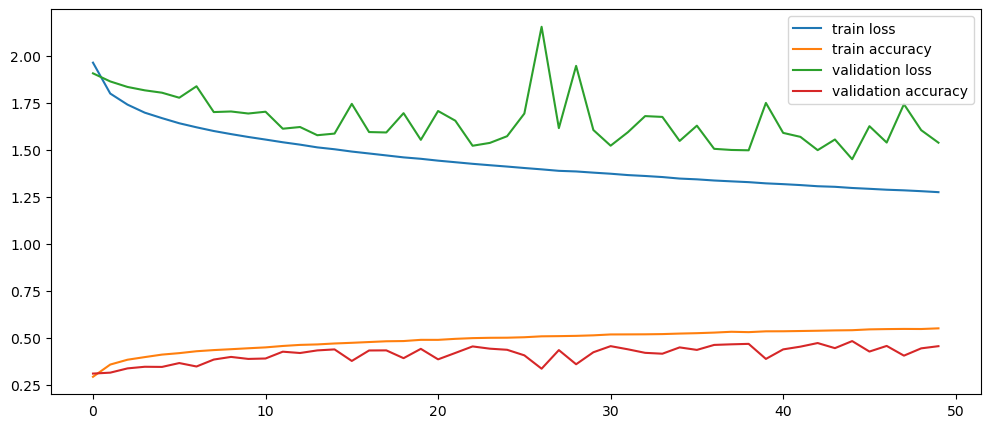

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_selu.history["loss"], label="train loss")
ax.plot(history_selu.history["accuracy"], label="train accuracy")
ax.plot(history_selu.history["val_loss"], label="validation loss")
ax.plot(history_selu.history["val_accuracy"], label="validation accuracy")
ax.legend()

# We will try an other activation function and using bath normalizing.
- Here we use RELU activation function but this time we will use "batch nromalizing" method.
- Note: As mentioned in above Markdown cell. we can not use SELU and self normalizing layers together, since it could interfere with SELU's self normalizing behaviour.

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation="softmax")
])



In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [15]:
history_relu_normalized = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1329/1329 [==============================] - 12s 6ms/step - loss: 2.1622 - accuracy: 0.2294 - val_loss: 1.9804 - val_accuracy: 0.2851
Epoch 2/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.9061 - accuracy: 0.3162 - val_loss: 1.9121 - val_accuracy: 0.3232
Epoch 3/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.8187 - accuracy: 0.3472 - val_loss: 1.7897 - val_accuracy: 0.3581
Epoch 4/50
1329/1329 [==============================] - 9s 7ms/step - loss: 1.7602 - accuracy: 0.3688 - val_loss: 1.7690 - val_accuracy: 0.3623
Epoch 5/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.7194 - accuracy: 0.3865 - val_loss: 1.8558 - val_accuracy: 0.3340
Epoch 6/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.6885 - accuracy: 0.3984 - val_loss: 1.7015 - val_accuracy: 0.3921
Epoch 7/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.6665 - accuracy: 0.4050 - val_loss: 1.6796 - val_accuracy

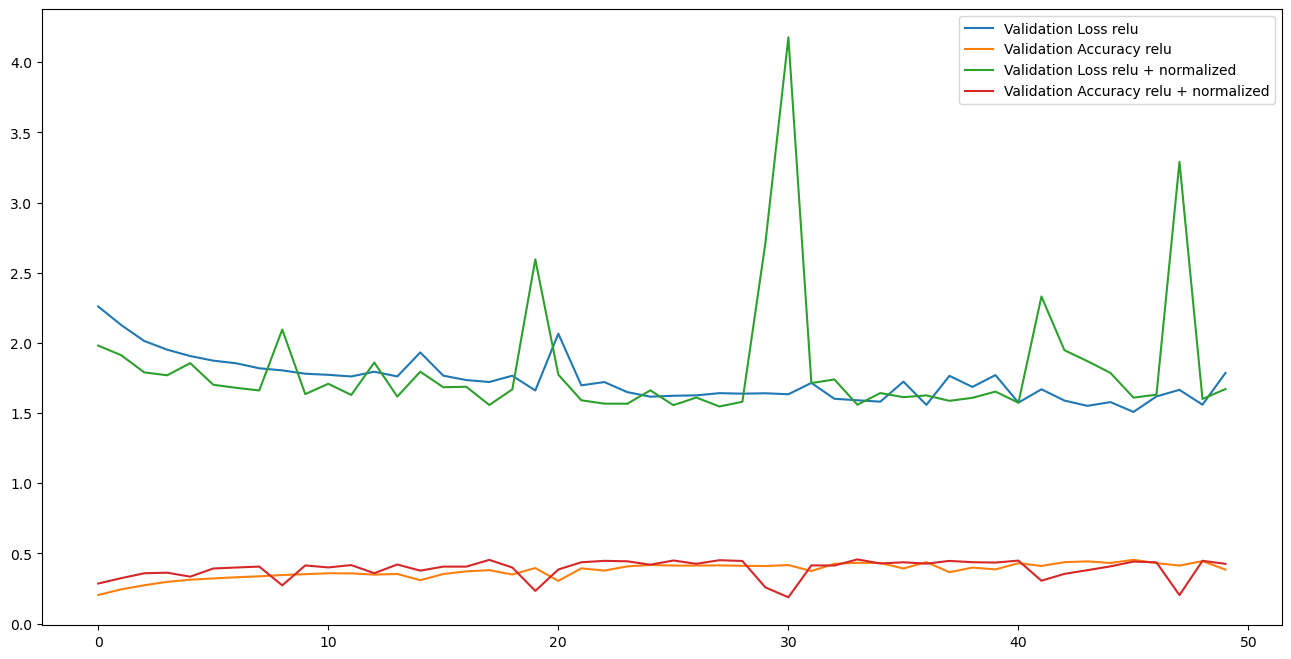

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot performance of the first model
# ax.plot(history_relu.history["loss"], label="Train Loss relu")
# ax.plot(history_relu.history["accuracy"], label="Train Accuracy relu")
ax.plot(history_relu.history["val_loss"], label="Validation Loss relu")
ax.plot(history_relu.history["val_accuracy"], label="Validation Accuracy relu")

# Plot performance of the second model
# ax.plot(history_relu_normalized.history["loss"], label="Train Loss relu + normalized")
# ax.plot(history_relu_normalized.history["accuracy"], label="Train Accuracy relu + normalized")
ax.plot(history_relu_normalized.history["val_loss"], label="Validation Loss relu + normalized")
ax.plot(history_relu_normalized.history["val_accuracy"], label="Validation Accuracy relu + normalized")

ax.legend(loc='upper right') 


# The graph for results shows that :
- First of all I commented the train loss and train accuracy to understand the result from graph easier. but you can uncomment that!
- Result shows that batch normalization decreased the validation loss and increased the validation accuracy subtly. however there are roghly 8 peaks in 8 epoch that validation loss in batch normalized model is much higher thatn model without batch normalization. overal batchnormalization slightly improved the model's performance in rest of the epoch. 

# In this section:
- We will modify the output in a way that we only predict wether object is a horse of not.
- We seperate 6000 of the data points from the whole dataset.
- After training the model we freeze all the layers exept the last layer. 
- Later we use the freezed model (earlier prepared model) to train on the data, to compare how much we have saved time with pretrained layers.

In [17]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255

In [18]:
import time
# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Modify the output data to only predict horse or not
y_binary_train = (y_train_full == 7).astype(np.float32)
y_binary_test = (y_test == 7).astype(np.float32)

# Convert the labels to one-hot encoded format
y_one_hot_train = to_categorical(y_binary_train)
y_one_hot_test = to_categorical(y_binary_test)

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_one_hot_train, test_size=0.2, random_state=42)

# Define the model
model_horse = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(2, activation="softmax")  # Output layer modified for binary classification
])


# Compile the model
model_horse.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_horse = model_horse.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
training_time = time.time() - start_time

# Report training time and accuracy
accuracy = history_horse.history['accuracy'][-1]




Epoch 1/50
1250/1250 [==============================] - 14s 7ms/step - loss: 0.2750 - accuracy: 0.9038 - val_loss: 0.2824 - val_accuracy: 0.9039
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2316 - accuracy: 0.9176 - val_loss: 0.2561 - val_accuracy: 0.9136
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2137 - accuracy: 0.9239 - val_loss: 0.2366 - val_accuracy: 0.9153
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2014 - accuracy: 0.9290 - val_loss: 0.2342 - val_accuracy: 0.9147
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1894 - accuracy: 0.9316 - val_loss: 0.2293 - val_accuracy: 0.9185
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1827 - accuracy: 0.9351 - val_loss: 0.2833 - val_accuracy: 0.9163
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1724 - accuracy: 0.9380 - val_loss: 0.2525 - val_accuracy

In [19]:
# Obtain the accuracy from history

# In the code accuracy = history_horse.history['accuracy'][-1], the [-1] indexing is used to access
# the last element of the accuracy values recorded in the history_horse object.

accuracy = history_horse.history['accuracy'][-1]

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9823750257492065


# Transfer Learning:
- In this section we transfer the architecture and weights from the model_horse to build a new model to detect the birds.
- Last we compare the training time and the accuracy of the model in both original model( horse_model) and model which built by transfering the weights from horse model(bird_model).

In [20]:
# now we gonna save the horse model that we trained.
model_horse.save("horse_model.h5")

In [21]:
modelb = keras.models.load_model("horse_model.h5")

In [22]:
modelb.get_weights()[4]

array([  774.11346 ,   496.55945 , -8083.0776  ,  -265.51904 ,
        3694.5364  ,  1333.1431  ,  -466.923   , -3475.8982  ,
       -3770.702   , -4008.5151  ,  2088.2449  , -3239.5288  ,
       -1934.8662  ,    19.825241,  -915.2064  ,  2048.3018  ,
         803.2552  ,  3459.6333  , -1541.9598  ,  2890.887   ,
        2930.445   ,  3963.4797  ,  7384.952   , -1571.2524  ,
        3127.0183  ,  -788.3386  , -3216.202   ,  2396.7524  ,
         587.4017  , -1621.2026  ,  1347.3041  ,  5284.3535  ,
        1545.0078  ,  -987.60364 ,  -476.5748  , -4782.702   ,
       -4421.07    ,  1302.7103  ,  1685.083   ,    51.232876,
       -1714.2428  ,  1979.2983  ,   840.60583 , -2991.597   ,
       -3622.8486  ,  5020.1133  , -3608.4521  , -1461.2135  ,
        2940.1135  , -2443.8225  , -3800.8333  ,   636.75305 ,
         728.5703  , -6432.622   , -1245.8625  ,  3116.6802  ,
       -3375.7576  , -1384.952   , -2950.5203  , -1377.9966  ,
       -1161.3479  , -2877.075   ,  4258.712   , -7230.

In [23]:
# we clone the models since if do not clone the model it will change the original model's weights too.
modelb_cloned= keras.models.clone_model(modelb)
modelb_cloned.set_weights(modelb.get_weights())


In [24]:
modelb_cloned.get_weights()[4]

array([  774.11346 ,   496.55945 , -8083.0776  ,  -265.51904 ,
        3694.5364  ,  1333.1431  ,  -466.923   , -3475.8982  ,
       -3770.702   , -4008.5151  ,  2088.2449  , -3239.5288  ,
       -1934.8662  ,    19.825241,  -915.2064  ,  2048.3018  ,
         803.2552  ,  3459.6333  , -1541.9598  ,  2890.887   ,
        2930.445   ,  3963.4797  ,  7384.952   , -1571.2524  ,
        3127.0183  ,  -788.3386  , -3216.202   ,  2396.7524  ,
         587.4017  , -1621.2026  ,  1347.3041  ,  5284.3535  ,
        1545.0078  ,  -987.60364 ,  -476.5748  , -4782.702   ,
       -4421.07    ,  1302.7103  ,  1685.083   ,    51.232876,
       -1714.2428  ,  1979.2983  ,   840.60583 , -2991.597   ,
       -3622.8486  ,  5020.1133  , -3608.4521  , -1461.2135  ,
        2940.1135  , -2443.8225  , -3800.8333  ,   636.75305 ,
         728.5703  , -6432.622   , -1245.8625  ,  3116.6802  ,
       -3375.7576  , -1384.952   , -2950.5203  , -1377.9966  ,
       -1161.3479  , -2877.075   ,  4258.712   , -7230.

In [25]:
model_bird = keras.models.Sequential(modelb.layers[:-1])
model_bird.add(keras.layers.Dense(2,activation= "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                196672    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                      

In [26]:
for layer in model_bird.layers[:-1]:
    layer.trainable = False
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [27]:
# we frized all layers except the last one. Notice the trainable params!
model_bird.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                196672    
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                      

In [28]:
import time

# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Modify the output data to only predict horse or not
y_binary_train = (y_train_full == 2).astype(np.float32)
y_binary_test = (y_test == 2).astype(np.float32)

# Convert the labels to one-hot encoded format
y_one_hot_train = to_categorical(y_binary_train)
y_one_hot_test = to_categorical(y_binary_test)

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_one_hot_train, test_size=0.2, random_state=42)

# Define the model
# model_bird

# Compile the model
model_bird.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start measuring training time
start_time = time.time()

# Train the model
history_bird = model_bird.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
# Calculate the training time
end_time = time.time()
training_time = end_time - start_time

# Print the training time
print("Training Time:", training_time, "seconds")

Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 0.3369 - accuracy: 0.8881 - val_loss: 0.3172 - val_accuracy: 0.8970
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3042 - accuracy: 0.9008 - val_loss: 0.3121 - val_accuracy: 0.8969
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2999 - accuracy: 0.9008 - val_loss: 0.3145 - val_accuracy: 0.8970
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2983 - accuracy: 0.9007 - val_loss: 0.3093 - val_accuracy: 0.8969
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2967 - accuracy: 0.9007 - val_loss: 0.3099 - val_accuracy: 0.8970
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2962 - accuracy: 0.9008 - val_loss: 0.3071 - val_accuracy: 0.8970
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2954 - accuracy: 0.9007 - val_loss: 0.3068 - val_accuracy:

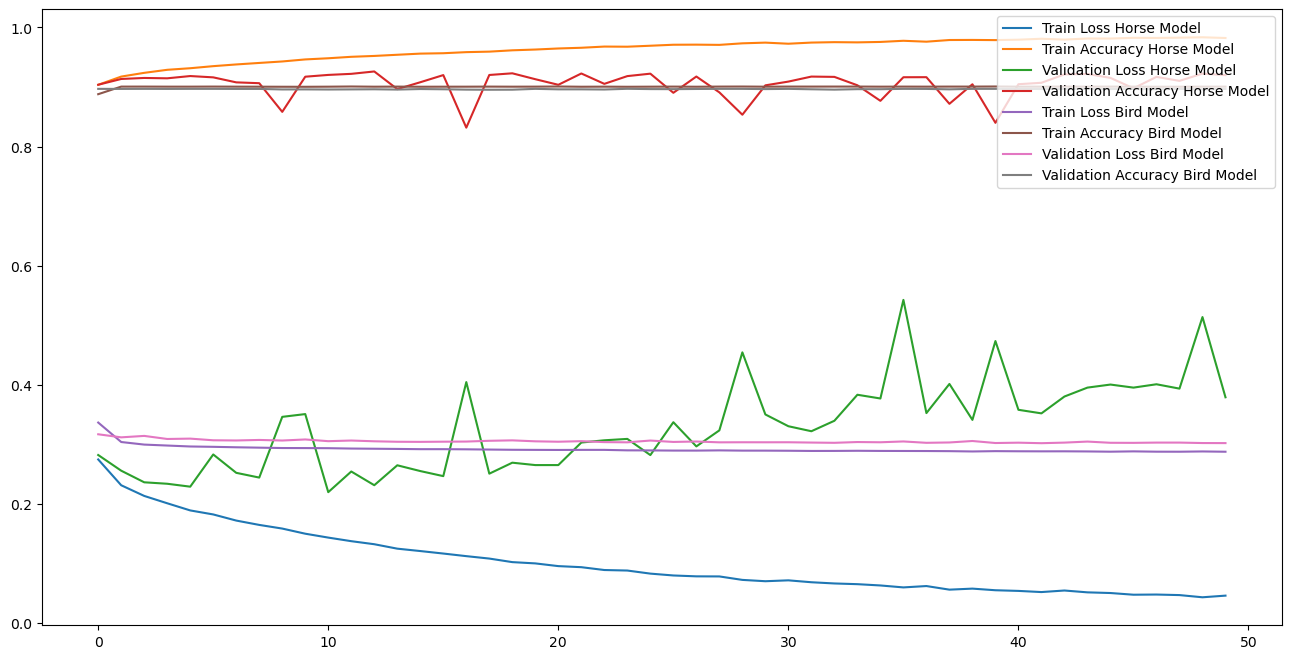

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot performance of the first model
ax.plot(history_horse.history["loss"], label="Train Loss Horse Model")
ax.plot(history_horse.history["accuracy"], label="Train Accuracy Horse Model")
ax.plot(history_horse.history["val_loss"], label="Validation Loss Horse Model")
ax.plot(history_horse.history["val_accuracy"], label="Validation Accuracy Horse Model")

# Plot performance of the second model
ax.plot(history_bird.history["loss"], label="Train Loss Bird Model")
ax.plot(history_bird.history["accuracy"], label="Train Accuracy Bird Model")
ax.plot(history_bird.history["val_loss"], label="Validation Loss Bird Model")
ax.plot(history_bird.history["val_accuracy"], label="Validation Accuracy Bird Model")

ax.legend(loc='upper right') 

# Result:
- Training time comparison showed model whcih learned based on transferd learning weights take shorter time to train their last layer( bird_model).

- Lets first look at hors_model: This model has "more parameters to train" so this lead a sharp decrease in train loss and have bigger difference between train loss and validation loss.
- like the train and validation loss, we see a similar pattern for train and validatio  accuracy in which we see a sharp increase in train and vlidation accuracy while the difference between them is significant when compared to the "bird_model".




- Now we asses the bird model: In the bird model we have first layers freezed and transfered form "horse-model" so it is understandable that why we don't have larger difference between accuracy or loss metrics between train and validation in bird model. overal we can say as the model have more trainable parameters, the accuracy and loss for train and validation would change sharply and there would be a larger gap between validation and train metrics.

# Trying different optimizers and comparing their performance:


In [2]:
# we prepared the data again for detecting all objects in the cifar-10 dataset.
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255

# convert labels to one hot encoded
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Print the dimensions of the data
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:' , x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (42500, 32, 32, 3)
y_train shape: (42500, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
x_val shape: (7500, 32, 32, 3)
y_val shape: (7500, 10)


In [3]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Define the optimizers to test
optimizers = {
    "SGD": keras.optimizers.SGD(),
    "SGD with momentum": keras.optimizers.SGD(momentum=0.9),
    "Nesterov SGD with momentum": keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "AdaGrad": keras.optimizers.Adagrad(),
    "Adam": keras.optimizers.Adam(),
    "Nadam": keras.optimizers.Nadam()
}

# Train the model with different optimizers and record accuracy and loss
results = {}
epochs = 50



for optimizer_name, optimizer in optimizers.items():
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=1)
    results[optimizer_name] = {
        "val_accuracy": history.history["val_accuracy"],
        "val_loss": history.history["val_loss"]
    }

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.0498 - accuracy: 0.2379 - val_loss: 1.9417 - val_accuracy: 0.3080
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8333 - accuracy: 0.3394 - val_loss: 2.1004 - val_accuracy: 0.2479
Epoch 3/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.7377 - accuracy: 0.3747 - val_loss: 1.9826 - val_accuracy: 0.2893
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6830 - accuracy: 0.3920 - val_loss: 1.7266 - val_accuracy: 0.3756
Epoch 5/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.6408 - accuracy: 0.4123 - val_loss: 2.2994 - val_accuracy: 0.2609
Epoch 6/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.6068 - accuracy: 0.4226 - val_loss: 1.9453 - val_accuracy: 0.3168
Epoch 7/50
1329/1329 [==============================] - 4s 3ms/step - loss: 1.5723 - accuracy: 0.4349 - val_loss: 1.9393 - val_accuracy:

1329/1329 [==============================] - 6s 4ms/step - loss: 1.4043 - accuracy: 0.4980 - val_loss: 1.6499 - val_accuracy: 0.4172
Epoch 8/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3934 - accuracy: 0.5039 - val_loss: 1.5403 - val_accuracy: 0.4517
Epoch 9/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3842 - accuracy: 0.5094 - val_loss: 1.7112 - val_accuracy: 0.4313
Epoch 10/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3690 - accuracy: 0.5115 - val_loss: 1.5080 - val_accuracy: 0.4723
Epoch 11/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3510 - accuracy: 0.5197 - val_loss: 1.5133 - val_accuracy: 0.4648
Epoch 12/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3418 - accuracy: 0.5211 - val_loss: 1.5142 - val_accuracy: 0.4643
Epoch 13/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3371 - accuracy: 0.5230 - val_loss: 1.5599 - val_accuracy: 0.4572

1329/1329 [==============================] - 5s 4ms/step - loss: 1.1172 - accuracy: 0.6017 - val_loss: 1.6272 - val_accuracy: 0.4859
Epoch 14/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1291 - accuracy: 0.6001 - val_loss: 1.5780 - val_accuracy: 0.4803
Epoch 15/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.1166 - accuracy: 0.6043 - val_loss: 1.5766 - val_accuracy: 0.4933
Epoch 16/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1204 - accuracy: 0.6042 - val_loss: 1.5981 - val_accuracy: 0.4817
Epoch 17/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1232 - accuracy: 0.6021 - val_loss: 1.6098 - val_accuracy: 0.4905
Epoch 18/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1183 - accuracy: 0.6045 - val_loss: 1.5892 - val_accuracy: 0.4797
Epoch 19/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1099 - accuracy: 0.6097 - val_loss: 1.5820 - val_accuracy: 0.47

1329/1329 [==============================] - 5s 4ms/step - loss: 0.7682 - accuracy: 0.7220 - val_loss: 1.6991 - val_accuracy: 0.5136
Epoch 20/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7663 - accuracy: 0.7228 - val_loss: 1.7013 - val_accuracy: 0.5136
Epoch 21/50
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7643 - accuracy: 0.7233 - val_loss: 1.7030 - val_accuracy: 0.5144
Epoch 22/50
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7627 - accuracy: 0.7242 - val_loss: 1.7059 - val_accuracy: 0.5139
Epoch 23/50
1329/1329 [==============================] - 6s 5ms/step - loss: 0.7610 - accuracy: 0.7254 - val_loss: 1.7066 - val_accuracy: 0.5161
Epoch 24/50
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7593 - accuracy: 0.7256 - val_loss: 1.7097 - val_accuracy: 0.5143
Epoch 25/50
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7578 - accuracy: 0.7261 - val_loss: 1.7079 - val_accuracy: 0.51

1329/1329 [==============================] - 6s 4ms/step - loss: 0.9503 - accuracy: 0.6598 - val_loss: 1.7164 - val_accuracy: 0.4917
Epoch 26/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9449 - accuracy: 0.6617 - val_loss: 1.6843 - val_accuracy: 0.4873
Epoch 27/50
1329/1329 [==============================] - 6s 5ms/step - loss: 0.9442 - accuracy: 0.6609 - val_loss: 1.6924 - val_accuracy: 0.4989
Epoch 28/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9388 - accuracy: 0.6640 - val_loss: 1.7254 - val_accuracy: 0.4992
Epoch 29/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9470 - accuracy: 0.6633 - val_loss: 1.6999 - val_accuracy: 0.4980
Epoch 30/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9337 - accuracy: 0.6663 - val_loss: 1.7485 - val_accuracy: 0.4912
Epoch 31/50
1329/1329 [==============================] - 6s 4ms/step - loss: 0.9335 - accuracy: 0.6652 - val_loss: 1.7922 - val_accuracy: 0.48

1329/1329 [==============================] - 8s 6ms/step - loss: 0.7761 - accuracy: 0.7233 - val_loss: 2.0473 - val_accuracy: 0.4877
Epoch 32/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7738 - accuracy: 0.7249 - val_loss: 2.1228 - val_accuracy: 0.4933
Epoch 33/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7853 - accuracy: 0.7199 - val_loss: 2.1190 - val_accuracy: 0.4889
Epoch 34/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7688 - accuracy: 0.7253 - val_loss: 2.0901 - val_accuracy: 0.4888
Epoch 35/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7584 - accuracy: 0.7287 - val_loss: 2.1224 - val_accuracy: 0.4933
Epoch 36/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7714 - accuracy: 0.7228 - val_loss: 2.0232 - val_accuracy: 0.4901
Epoch 37/50
1329/1329 [==============================] - 8s 6ms/step - loss: 0.7682 - accuracy: 0.7241 - val_loss: 2.0544 - val_accuracy: 0.48

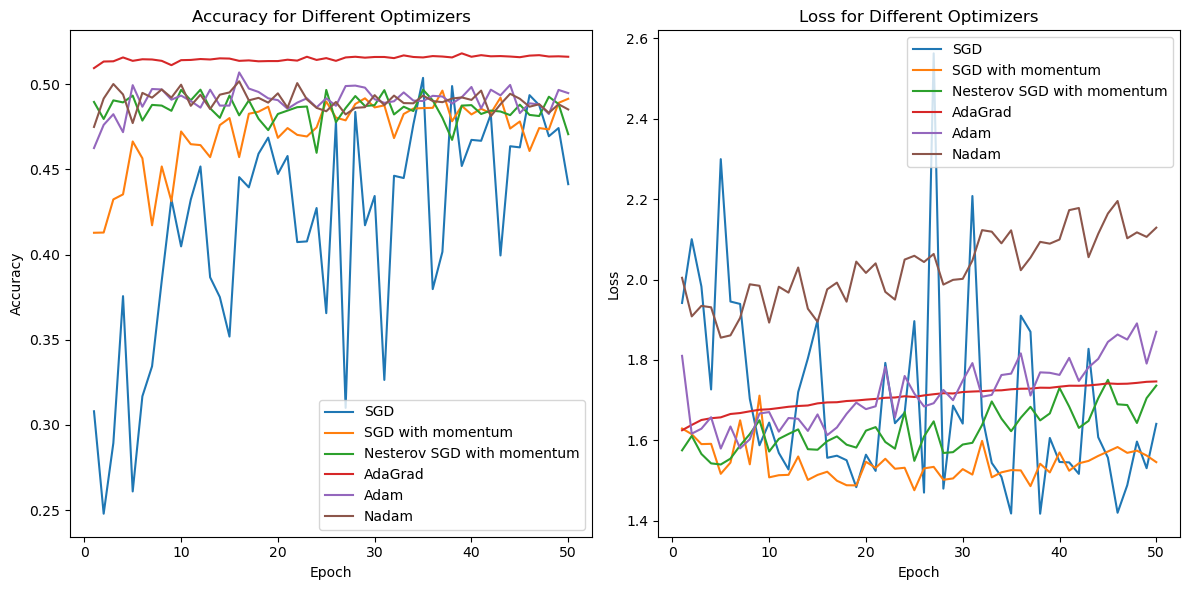

In [4]:
# Plot accuracy for all models
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for optimizer_name, result in results.items():
    axs[0].plot(range(1, epochs + 1), result["val_accuracy"], label=optimizer_name)

axs[0].set_title("Accuracy for Different Optimizers")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="best")

# Plot loss for all models
for optimizer_name, result in results.items():
    axs[1].plot(range(1, epochs + 1), result["val_loss"], label=optimizer_name)

axs[1].set_title("Loss for Different Optimizers")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="best")

plt.tight_layout()
plt.show()

# Effect of Dropout and L1 , L2 regularization on model's performance:
- In first model we simply use L1,L2 regularization and dropout technique to decrease the risk of overfitting( since L1 regularization didn't show any improvement in model's accuracy I didn't use that in next code cells, instead I use L2 regularizaion method which showed a very good result for model's accuracy.
- In the second model we substitute L2 technique with dropout layers.
- Since the accuracy for all models was bellow 0.5 I decided to use keras tuning method to find better model which uses the dropout regularization method.
- Last I used the keras tuned model with dropout layers to make a Monte Carlo drop out model and let the model have a better decisions.

In [ ]:
# we first try dropout to prevent overfitting. then we using l1-l2 regularizers.


In [5]:
from keras.optimizers import Adagrad, Nadam, Adam
from keras.regularizers import l1_l2
from keras.layers import Dropout

# we prepared the data again for detecting all objects in the cifar-10 dataset.
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255


# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# convert labels to one hot encoded
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Model with "relu" activation function.
model_drop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu"), 
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax")
])

model_drop.compile(loss="categorical_crossentropy",
              optimizer=Adagrad(learning_rate=0.001),
              metrics=["accuracy"])

# Training the model with regularization
history_drop = model_drop.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
1329/1329 [==============================] - 8s 5ms/step - loss: 2.2865 - accuracy: 0.1270 - val_loss: 2.2428 - val_accuracy: 0.1944
Epoch 2/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.1946 - accuracy: 0.1800 - val_loss: 2.0761 - val_accuracy: 0.2451
Epoch 3/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.0820 - accuracy: 0.2160 - val_loss: 2.0068 - val_accuracy: 0.2631
Epoch 4/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.0260 - accuracy: 0.2398 - val_loss: 1.9585 - val_accuracy: 0.2821
Epoch 5/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9988 - accuracy: 0.2516 - val_loss: 1.9339 - val_accuracy: 0.2931
Epoch 6/100
1329/1329 [==============================] - 7s 5ms/step - loss: 1.9768 - accuracy: 0.2609 - val_loss: 1.9304 - val_accuracy: 0.2877
Epoch 7/100
1329/1329 [==============================] - 7s 5ms/step - loss: 1.9602 - accuracy: 0.2718 - val_loss: 1.8950 - val_ac

1329/1329 [==============================] - 7s 5ms/step - loss: 1.6736 - accuracy: 0.3926 - val_loss: 1.6256 - val_accuracy: 0.4084
Epoch 58/100
1329/1329 [==============================] - 7s 5ms/step - loss: 1.6775 - accuracy: 0.3877 - val_loss: 1.6231 - val_accuracy: 0.4087
Epoch 59/100
1329/1329 [==============================] - 7s 6ms/step - loss: 1.6711 - accuracy: 0.3940 - val_loss: 1.6282 - val_accuracy: 0.4095
Epoch 60/100
1329/1329 [==============================] - 7s 6ms/step - loss: 1.6656 - accuracy: 0.3909 - val_loss: 1.6204 - val_accuracy: 0.4104
Epoch 61/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.6676 - accuracy: 0.3952 - val_loss: 1.6171 - val_accuracy: 0.4083
Epoch 62/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.6614 - accuracy: 0.3964 - val_loss: 1.6140 - val_accuracy: 0.4121
Epoch 63/100
1329/1329 [==============================] - 8s 6ms/step - loss: 1.6617 - accuracy: 0.3965 - val_loss: 1.6148 - val_accuracy

In [7]:
from keras.optimizers import Adagrad, Nadam, Adam
from keras.regularizers import l1_l2
from keras.layers import Dropout

# we prepared the data again for detecting all objects in the cifar-10 dataset.
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255


# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# convert labels to one hot encoded
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Model with "relu" activation function.
model_L2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax")
])

model_L2.compile(loss="categorical_crossentropy",
              optimizer=Adagrad(learning_rate=0.001),
              metrics=["accuracy"])

# Training the model with regularization
history_L2 = model_L2.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
1329/1329 [==============================] - 7s 5ms/step - loss: 6.0801 - accuracy: 0.1673 - val_loss: 5.6806 - val_accuracy: 0.2049
Epoch 2/100
1329/1329 [==============================] - 7s 5ms/step - loss: 5.3748 - accuracy: 0.2528 - val_loss: 5.1520 - val_accuracy: 0.2444
Epoch 3/100
1329/1329 [==============================] - 7s 5ms/step - loss: 4.9021 - accuracy: 0.2868 - val_loss: 4.7251 - val_accuracy: 0.2939
Epoch 4/100
1329/1329 [==============================] - 7s 5ms/step - loss: 4.5430 - accuracy: 0.3017 - val_loss: 4.4006 - val_accuracy: 0.3031
Epoch 5/100
1329/1329 [==============================] - 8s 6ms/step - loss: 4.2536 - accuracy: 0.3100 - val_loss: 4.1310 - val_accuracy: 0.3099
Epoch 6/100
1329/1329 [==============================] - 7s 6ms/step - loss: 4.0147 - accuracy: 0.3181 - val_loss: 3.9115 - val_accuracy: 0.3197
Epoch 7/100
1329/1329 [==============================] - 7s 5ms/step - loss: 3.8141 - accuracy: 0.3224 - val_loss: 3.7381 - val_ac

1329/1329 [==============================] - 7s 5ms/step - loss: 2.2743 - accuracy: 0.3823 - val_loss: 2.3020 - val_accuracy: 0.3723
Epoch 58/100
1329/1329 [==============================] - 6s 5ms/step - loss: 2.2698 - accuracy: 0.3839 - val_loss: 2.2961 - val_accuracy: 0.3677
Epoch 59/100
1329/1329 [==============================] - 6s 5ms/step - loss: 2.2653 - accuracy: 0.3831 - val_loss: 2.2804 - val_accuracy: 0.3752
Epoch 60/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.2612 - accuracy: 0.3839 - val_loss: 2.2761 - val_accuracy: 0.3760
Epoch 61/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.2569 - accuracy: 0.3855 - val_loss: 2.2729 - val_accuracy: 0.3743
Epoch 62/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.2525 - accuracy: 0.3862 - val_loss: 2.2672 - val_accuracy: 0.3781
Epoch 63/100
1329/1329 [==============================] - 7s 5ms/step - loss: 2.2487 - accuracy: 0.3869 - val_loss: 2.2674 - val_accuracy

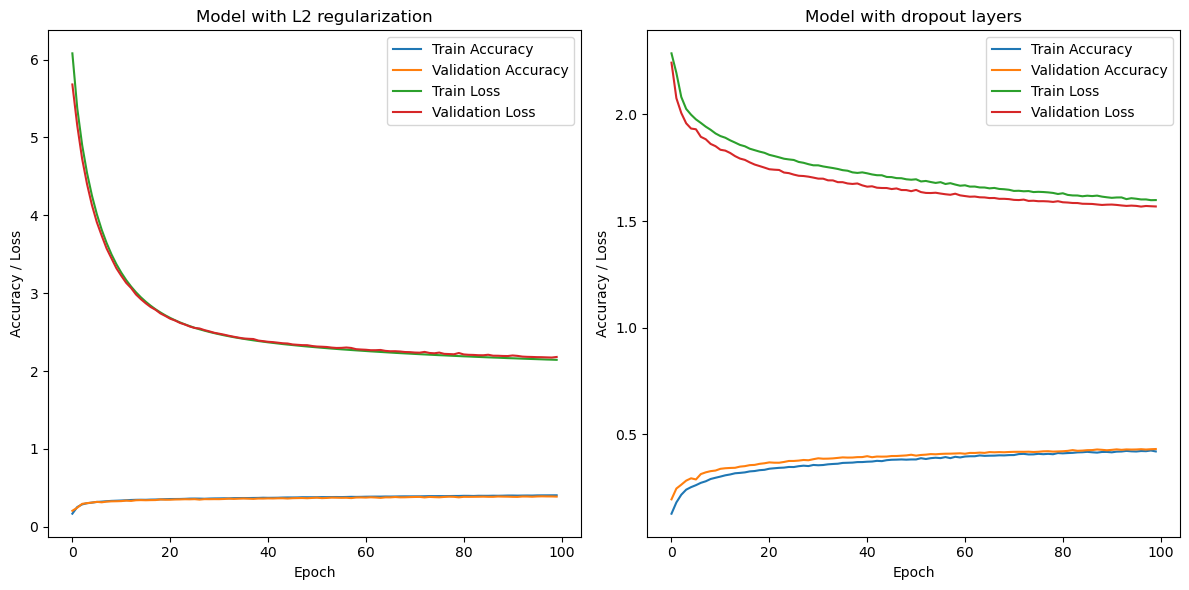

In [9]:
import matplotlib.pyplot as plt

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting accuracy and loss for model with L2 regularization
axs[0].plot(history_L2.history['accuracy'], label='Train Accuracy')
axs[0].plot(history_L2.history['val_accuracy'], label='Validation Accuracy')
axs[0].plot(history_L2.history['loss'], label='Train Loss')
axs[0].plot(history_L2.history['val_loss'], label='Validation Loss')
axs[0].set_title("Model with L2 regularization")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy / Loss")
axs[0].legend()

# Plotting accuracy and loss for model with dropout layers
axs[1].plot(history_drop.history['accuracy'], label='Train Accuracy')
axs[1].plot(history_drop.history['val_accuracy'], label='Validation Accuracy')
axs[1].plot(history_drop.history['loss'], label='Train Loss')
axs[1].plot(history_drop.history['val_loss'], label='Validation Loss')
axs[1].set_title("Model with dropout layers")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy / Loss")
axs[1].legend()

# Displaying the plots
plt.tight_layout()
plt.show()


# The train accuracy and validation accuracy became closer:
- in both L2 and dropout methods the validation accuracy and train accuracy are so simillar that indicates these methods regularized the model and decreased the model's overfitting significantly.
- Despite the fact that the validation and training accuracies became very similar, the use of a regularizer resulted in a decrease in accuracy for both the validation and training sets.


# Let's use Keras Tuner:
- Since the accuracy is bellow 50% I decided to leverage Keras tuner to improve a little bit model's performance!
- There is a trade off between overfitting and underfitting. If the regularization is too agrresive our models performance will decrease.
- So, I have decided to use Keras Tuner to search for models that incorporate sufficient regularization techniques. This approach aims to prevent overfitting while maintaining a good level of accuracy.

In [31]:
# we prepared the data again for detecting all objects in the cifar-10 dataset.
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255


# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# convert labels to one hot encoded
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


In [40]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adagrad

def build_model(hp):
    model_tk_drop = Sequential()
    model_tk_drop.add(Flatten(input_shape=(32, 32, 3)))  # Update input shape here
    model_tk_drop.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))

    # Add variable number of hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=4)):
        model_tk_drop.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
        model_tk_drop.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.3, step=0.1)))

    model_tk_drop.add(Dense(10, activation='softmax'))

    # Define the optimizer
    optimizer = Adagrad(learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001]))

    model_tk_drop.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model_tk_drop

# Define the tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3,
                     directory="D:/video-learning/maktabkhoneh/tf_keras", project_name='tk_drop_cifar10')




INFO:tensorflow:Reloading Tuner from D:/video-learning/maktabkhoneh/tf_keras\tk_drop_cifar10\tuner0.json


In [41]:
# Perform the hyperparameter search
tuner.search(x=x_train, y=y_train, validation_data=(x_val, y_val))


Trial 26 Complete [00h 01m 45s]
val_accuracy: 0.22866666316986084

Best val_accuracy So Far: 0.41280001401901245
Total elapsed time: 00h 17m 48s
INFO:tensorflow:Oracle triggered exit


In [42]:
# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model_kt_drop = tuner.hypermodel.build(best_hps)


In [47]:
# Print the summary of the model
best_model_kt_drop.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 160)               20640     
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                10304     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [43]:
# now we fit the best model to our data
history_kt_drop = best_model_kt_drop.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
1329/1329 [==============================] - 8s 5ms/step - loss: 0.3291 - accuracy: 0.1910 - val_loss: 0.2968 - val_accuracy: 0.2721
Epoch 2/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2987 - accuracy: 0.2714 - val_loss: 0.2845 - val_accuracy: 0.3052
Epoch 3/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2876 - accuracy: 0.3054 - val_loss: 0.2770 - val_accuracy: 0.3245
Epoch 4/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2798 - accuracy: 0.3317 - val_loss: 0.2707 - val_accuracy: 0.3473
Epoch 5/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2742 - accuracy: 0.3480 - val_loss: 0.2673 - val_accuracy: 0.3591
Epoch 6/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2690 - accuracy: 0.3640 - val_loss: 0.2624 - val_accuracy: 0.3681
Epoch 7/100
1329/1329 [==============================] - 7s 5ms/step - loss: 0.2647 - accuracy: 0.3734 - val_loss: 0.2612 - val_ac

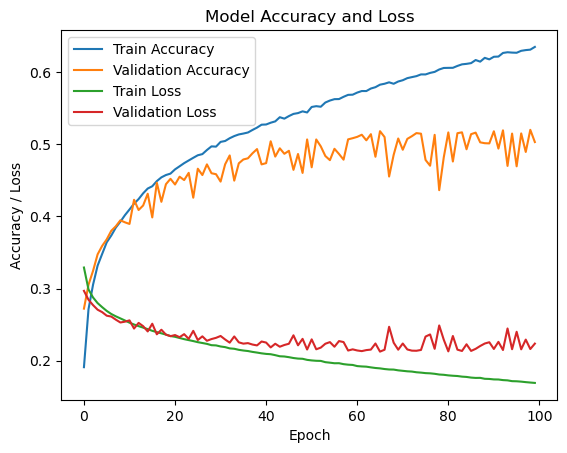

In [48]:
# Plotting accuracy and loss
plt.plot(history_kt_drop.history['accuracy'], label='Train Accuracy')
plt.plot(history_kt_drop.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_kt_drop.history['loss'], label='Train Loss')
plt.plot(history_kt_drop.history['val_loss'], label='Validation Loss')
plt.title("Model Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()
plt.show()

In [80]:
# Predict class labels for the all datasets (train validation and test)
test_y_pred_KT_drop = best_model_kt_drop.predict(x_test)
train_y_pred_KT_drop = best_model_kt_drop.predict(x_train)
val_y_pred_KT_drop = best_model_kt_drop.predict(x_val)

# Convert probabilities for the predictions to class labels               
test_pred_KT_drop = np.argmax(test_y_pred_KT_drop, axis=1)
train_pred_KT_drop = np.argmax(train_y_pred_KT_drop, axis=1)
val_pred_KT_drop = np.argmax(val_y_pred_KT_drop, axis=1)

# convert one-hot encoded labels to integer.
y_testing = np.argmax(y_test, axis=1)
y_training = np.argmax(y_train, axis=1)
y_validation = np.argmax(y_val, axis=1)

235/235 [==============================] - 1s 5ms/step


In [81]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix_KT_drop = confusion_matrix(y_testing, test_pred_KT_drop)

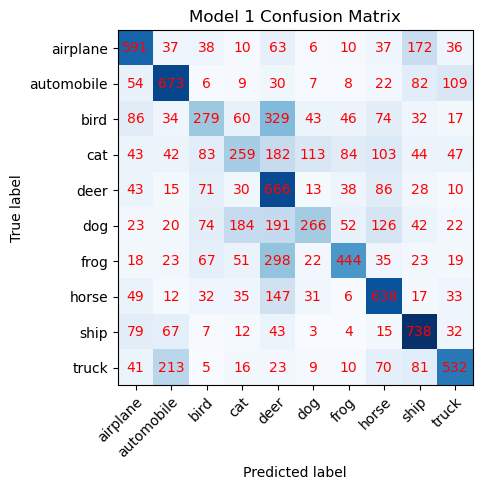

In [82]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the confusion matrix
im = ax.imshow(conf_matrix_KT_drop, cmap=plt.cm.Blues)

# Set labels, title, and ticks
ax.set(xticks=np.arange(len(class_names)),
       yticks=np.arange(len(class_names)),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Model 1 Confusion Matrix')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, conf_matrix_KT_drop[i, j], ha="center", va="center", color="r")

# Show the plot
plt.tight_layout()
plt.show()


# Monte Carlo Dropout
- From the model using dropout method, we want to have a Monte Carlo dropout model and see how it helps model to decide the class of the objects.

In [89]:
model_mcd = np.stack([best_model_kt_drop(x_test, training=True) for _ in range(50)])

In [90]:
# out of shape shows: we have 50 models, in each model we have 10000 samples which classified in 10 classes.
model_mcd.shape

(50, 10000, 10)

In [91]:
# prediction with model including just dropouts.
np.round(best_model_kt_drop.predict(x_test[:1]), 3)

1/1 [==============================] - 7s 7s/step


array([[0.005, 0.265, 0.004, 0.519, 0.005, 0.121, 0.017, 0.   , 0.052,
        0.012]], dtype=float32)

In [92]:
np.round(model_mcd[:, :1],3)

array([[[0.01 , 0.451, 0.004, 0.414, 0.009, 0.079, 0.012, 0.   , 0.019,
         0.002]],

       [[0.001, 0.203, 0.001, 0.614, 0.002, 0.112, 0.003, 0.   , 0.057,
         0.004]],

       [[0.014, 0.223, 0.004, 0.448, 0.009, 0.139, 0.052, 0.   , 0.102,
         0.007]],

       [[0.001, 0.675, 0.001, 0.226, 0.001, 0.083, 0.004, 0.   , 0.005,
         0.005]],

       [[0.002, 0.374, 0.003, 0.486, 0.007, 0.079, 0.01 , 0.   , 0.035,
         0.004]],

       [[0.001, 0.035, 0.003, 0.768, 0.005, 0.163, 0.003, 0.   , 0.021,
         0.002]],

       [[0.001, 0.528, 0.003, 0.272, 0.006, 0.113, 0.03 , 0.   , 0.042,
         0.004]],

       [[0.009, 0.224, 0.003, 0.352, 0.026, 0.083, 0.01 , 0.011, 0.27 ,
         0.013]],

       [[0.004, 0.345, 0.002, 0.477, 0.002, 0.11 , 0.005, 0.   , 0.053,
         0.003]],

       [[0.015, 0.065, 0.004, 0.617, 0.004, 0.145, 0.053, 0.001, 0.092,
         0.005]],

       [[0.002, 0.093, 0.003, 0.647, 0.011, 0.088, 0.03 , 0.001, 0.115,
         0.009]],


In [95]:
# so in this sample model predicted the object's labe should be 3.
x= np.round(model_mcd.mean(axis=0)[:], 3)
x.shape

(10000, 10)

In [103]:
# Determine the predicted class for each object
predicted_classes_MCD = np.argmax(x, axis=1)
print(predicted_classes_MCD)


[3 8 0 ... 3 4 7]


In [104]:
# Calculate confusion matrix
conf_matrix_mcd = confusion_matrix(y_testing, predicted_classes_MCD)

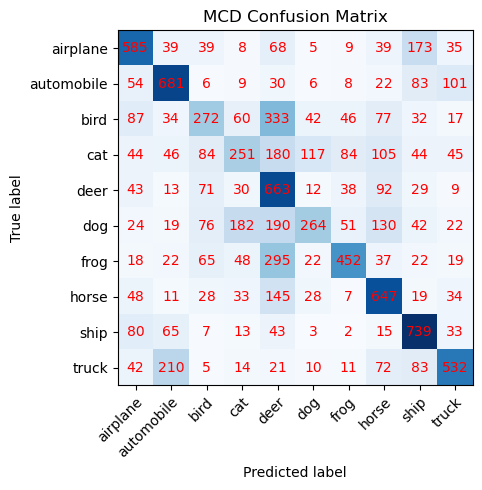

In [105]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the confusion matrix
im = ax.imshow(conf_matrix_mcd, cmap=plt.cm.Blues)

# Set labels, title, and ticks
ax.set(xticks=np.arange(len(class_names)),
       yticks=np.arange(len(class_names)),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='MCD Confusion Matrix')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, conf_matrix_mcd[i, j], ha="center", va="center", color="r")

# Show the plot
plt.tight_layout()
plt.show()


# lets see Monter carlo and simple dropout model's confusion matrix side by side:

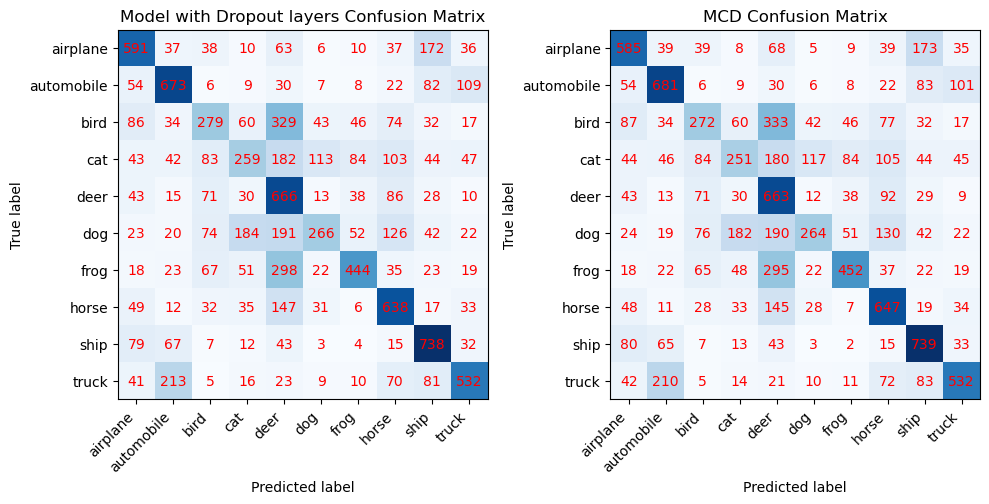

In [106]:
import matplotlib.pyplot as plt

# Confusion matrix 1
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Subplot 1 - Model 1 Confusion Matrix
ax1 = axs[0]
im1 = ax1.imshow(conf_matrix_KT_drop, cmap=plt.cm.Blues)
ax1.set_xticks(np.arange(len(class_names)))
ax1.set_yticks(np.arange(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha="right")
ax1.set_yticklabels(class_names)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('Model with Dropout layers Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax1.text(j, i, conf_matrix_KT_drop[i, j], ha="center", va="center", color="r")

# Confusion matrix 2
# Subplot 2 - MCD Confusion Matrix
ax2 = axs[1]
im2 = ax2.imshow(conf_matrix_mcd, cmap=plt.cm.Blues)
ax2.set_xticks(np.arange(len(class_names)))
ax2.set_yticks(np.arange(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha="right")
ax2.set_yticklabels(class_names)
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('True label')
ax2.set_title('MCD Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax2.text(j, i, conf_matrix_mcd[i, j], ha="center", va="center", color="r")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.tight_layout()
plt.show()
